In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data Model - Pizza Sales.csv")

In [3]:
df.shape

(48620, 12)

In [4]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [6]:
df["unit_price"] = df["unit_price"].astype("int")
df["total_price"] = df["total_price"].astype("int")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   order_details_id   48620 non-null  int64 
 1   order_id           48620 non-null  int64 
 2   pizza_id           48620 non-null  object
 3   quantity           48620 non-null  int64 
 4   order_date         48620 non-null  object
 5   order_time         48620 non-null  object
 6   unit_price         48620 non-null  int32 
 7   total_price        48620 non-null  int32 
 8   pizza_size         48620 non-null  object
 9   pizza_category     48620 non-null  object
 10  pizza_ingredients  48620 non-null  object
 11  pizza_name         48620 non-null  object
dtypes: int32(2), int64(3), object(7)
memory usage: 4.1+ MB


In [18]:
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [26]:
df.duplicated("order_details_id").sum()

0

In [25]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.037310,16.368161
std,14035.529381,6180.119770,0.143077,3.514367,4.361458
min,1.000000,1.000000,1.000000,9.000000,9.000000
25%,12155.750000,5337.000000,1.000000,12.000000,12.000000
50%,24310.500000,10682.500000,1.000000,16.000000,16.000000
75%,36465.250000,16100.000000,1.000000,20.000000,20.000000
max,48620.000000,21350.000000,4.000000,35.000000,83.000000


In [119]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'order_datetime'],
      dtype='object')

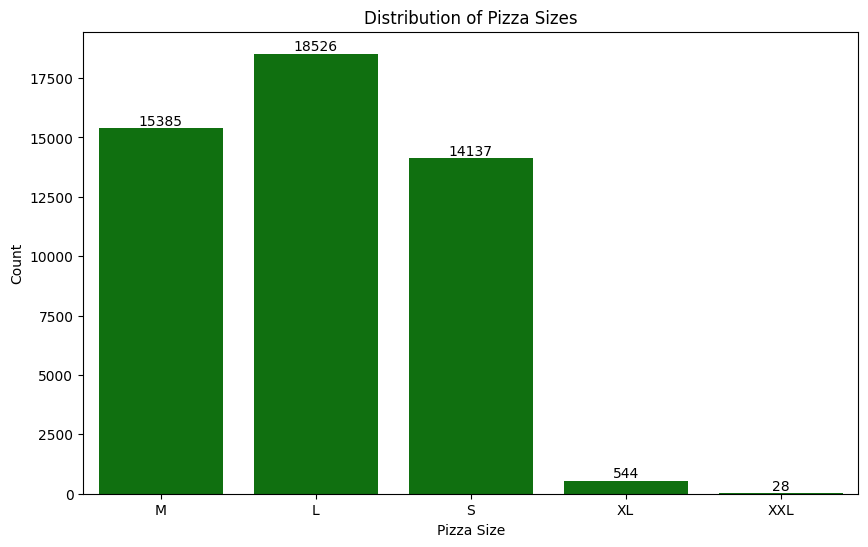

In [114]:
# Bar plot for pizza sizes
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='pizza_size', data=df, color="green")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of Pizza Sizes')
plt.xlabel('Pizza Size')
plt.ylabel('Count')
plt.show()



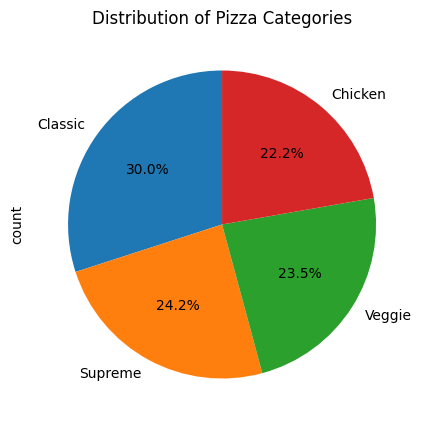

In [25]:
# Pie chart for pizza categories
plt.figure(figsize=(5, 5))
df['pizza_category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Pizza Categories')
plt.show()


In [123]:
#most ordered pizza 
count=df.groupby("pizza_name")["order_id"].count().sort_values().tail(10)
print(count)


pizza_name
The Four Cheese Pizza           1850
The Southwest Chicken Pizza     1885
The Sicilian Pizza              1887
The Spicy Italian Pizza         1887
The California Chicken Pizza    2302
The Thai Chicken Pizza          2315
The Pepperoni Pizza             2369
The Hawaiian Pizza              2370
The Barbecue Chicken Pizza      2372
The Classic Deluxe Pizza        2416
Name: order_id, dtype: int64


In [57]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

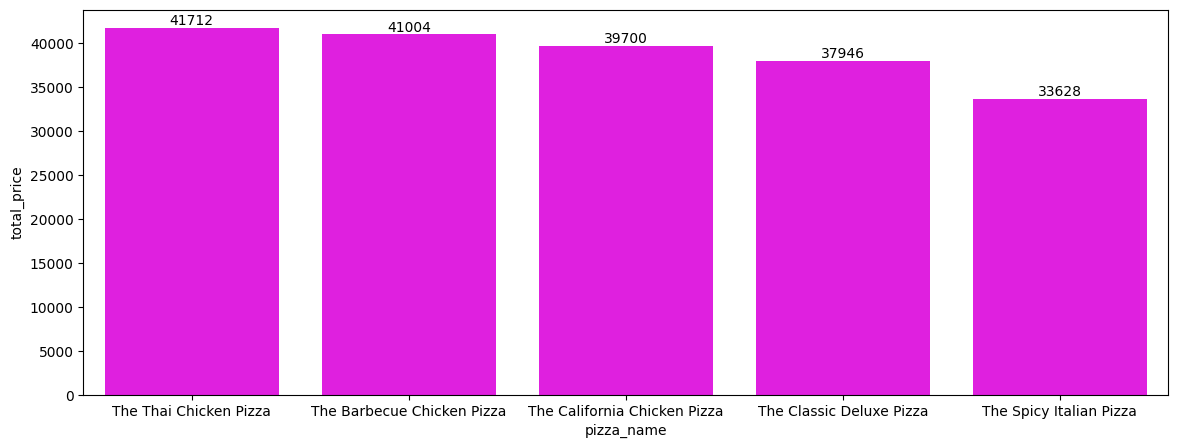

In [23]:
#top 10 pizza have highest total price
plt.figure(figsize=(14, 5))
sales = df.groupby(['pizza_name'], as_index=False)['total_price'].sum().sort_values(by='total_price', ascending=False).head()

ax=sns.barplot(x = 'pizza_name',y= 'total_price' ,data = sales, color = "magenta")
for bars in ax.containers:
    ax.bar_label(bars)

In [26]:
# Average total price per pizza category
g= df.groupby('pizza_category')['total_price'].mean()
print(g)


pizza_category
Chicken    17.370966
Classic    14.826737
Supreme    17.158699
Veggie     16.570530
Name: total_price, dtype: float64


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  object        
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  int32         
 7   total_price        48620 non-null  int32         
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
 12  order_datetime     48620 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(2), int64(3), object(7)
memory us

In [109]:
# Number of pizzas ordered each day
pizzas_per_day= df.groupby('order_date')['quantity'].sum()
print(pizzas_per_day)

order_date
1/1/2015     162
1/10/2015    146
1/11/2015    116
1/12/2015    119
1/13/2015    120
            ... 
9/5/2015     153
9/6/2015      92
9/7/2015     140
9/8/2015     133
9/9/2015     157
Name: quantity, Length: 358, dtype: int64


In [112]:
# Top 5 pizza names ordered
pizza = df['pizza_name'].value_counts().head(5)
print(pizza)


pizza_name
The Classic Deluxe Pizza      2416
The Barbecue Chicken Pizza    2372
The Hawaiian Pizza            2370
The Pepperoni Pizza           2369
The Thai Chicken Pizza        2315
Name: count, dtype: int64
